# ECS 171 Project :)
## K-nearest neighbor algorithm 

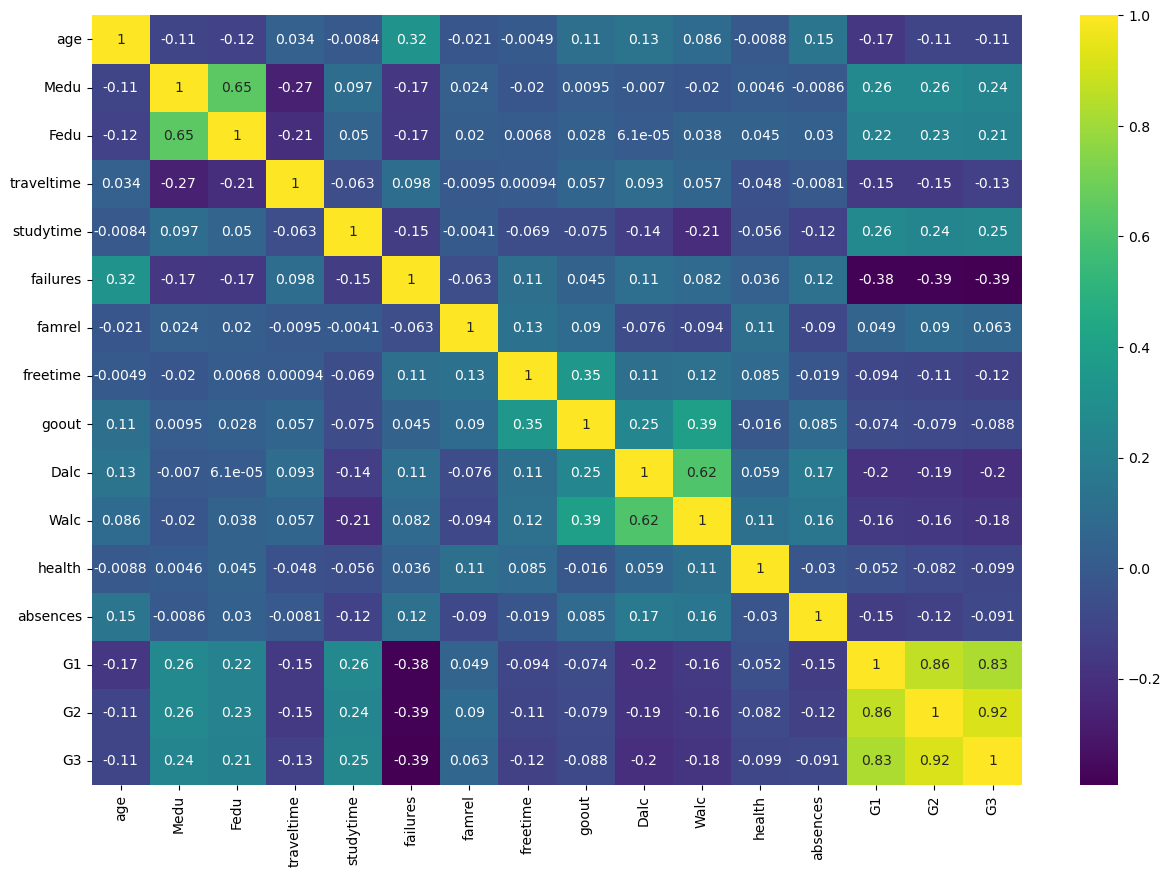

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded and preprocessed the data
por = pd.read_csv('student-por.csv')
por = por.drop(columns=['Mjob', 'Fjob', 'reason', 'guardian', 'school', 'sex', 'famsize', 'Pstatus', 'address', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

# Create the heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(por.corr(), annot=True, cmap="viridis")

# Save the heatmap as a PNG file
plt.savefig('heatmap.png')

# Show the plot (optional)
plt.show()

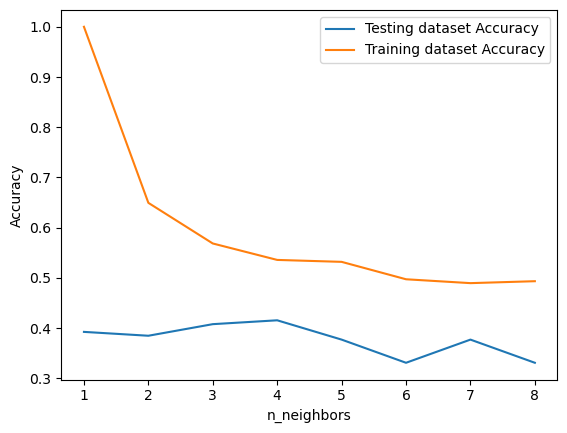

Accuracy: 37.69%
MSE: 2.8461538461538463
R2: 0.7081381519866022


In [16]:
# k near neighbors algorithm for ml
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
  
X = por.drop(columns=['G3'])
y = por['G3']
  
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 
  
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # compute training and testing accuracies 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# create plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

# n_neighbors=7 seems to be most accurate for both test and train?
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


# compute mean squared error and r squared
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

Accuracy: 37.97%


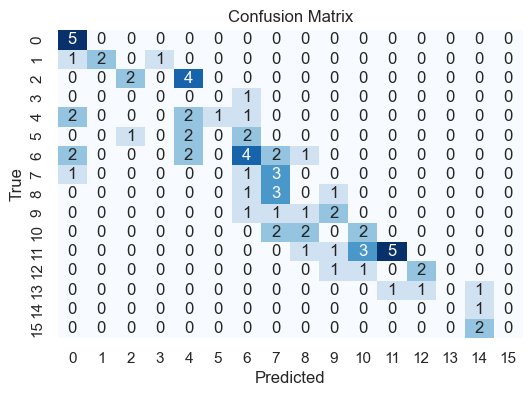

In [62]:
# n_neighbors=7 seems to be most accurate for both test and train?
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()